# NECESSARY LIBRARIES

In [1]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Activation, Flatten, AveragePooling2D, MaxPooling2D
from keras.optimizers import Adam

Using TensorFlow backend.


# LOADING THE DATASET

In [2]:
# LOADING DATASET INTO df AS DATAFRAME
df = pd.read_csv('../input/urbansound8k/UrbanSound8K.csv')

# STORING LIST OF CLASS LABLES IN THE VARIABLE labels
labels = list(df['class'].unique())



# LOADED DATASET VIEW AND DESCRIPTION

In [3]:
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [4]:
df.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


[Text(0, 0, 'dog_bark'),
 Text(0, 0, 'children_playing'),
 Text(0, 0, 'car_horn'),
 Text(0, 0, 'air_conditioner'),
 Text(0, 0, 'street_music'),
 Text(0, 0, 'gun_shot'),
 Text(0, 0, 'siren'),
 Text(0, 0, 'engine_idling'),
 Text(0, 0, 'jackhammer'),
 Text(0, 0, 'drilling')]

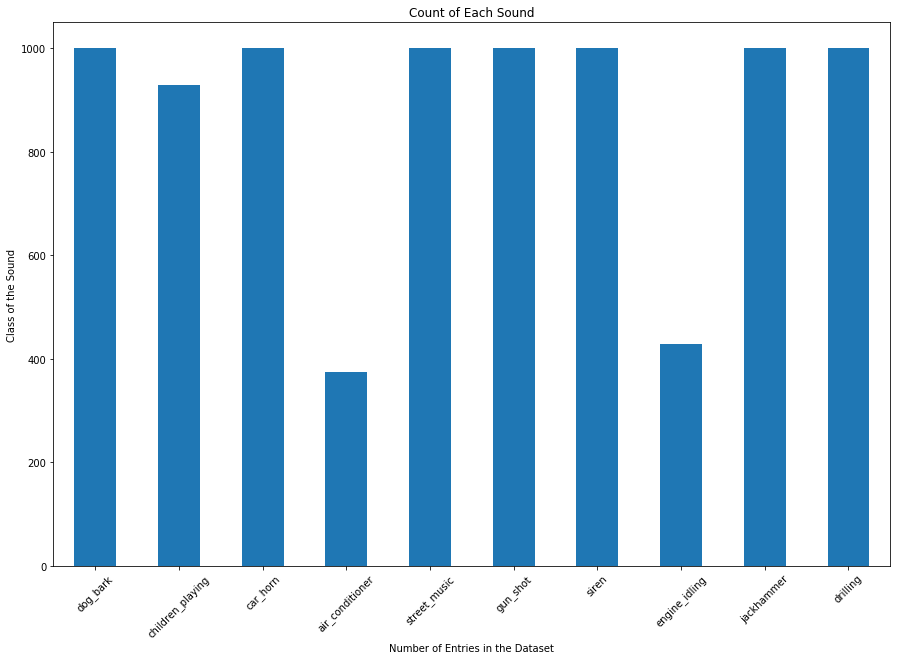

In [5]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


plot = df['class'].value_counts(sort=False).plot(
    kind='bar',
    title='Count of Each Sound',
    figsize=(15,10)
)
plot.set_ylabel('Class of the Sound')
plot.set_xlabel('Number of Entries in the Dataset')
plot.set_xticklabels(labels, rotation=45)


# ANALYSIS OF A AUDIO FILE

## LOADING AN AUDIO FILE FROM THE DATASET

In [6]:

filepath = '../input/urbansound8k/fold5/100263-2-0-117.wav'

# OBTAINING THE SAMPLES AS WELL AS THE SAMPLING RATE USNG THE librosa LOAD FUNCTION
samples, sampling_rate = librosa.load(filepath)

'''
    NOTE:
        Librosa is a special library for the audio files
        It provides some implicit preprocessing of the audio files
            -> It will automatically convert the sampling rate to 22.05 KHz
            -> It will automatically normalize the bit depth between -1 and 1

'''

# THIS IS A FUNCTION FROM WAV LIBRARY
# IT WILL TELL THE ORIGINAL SAMPLING RATE OF THE AUDIO FILE
orig_sample_rate, audio_data = wav.read(filepath)


In [7]:
# DURATION OF THE AUDIO FILE 
duration_of_sound = len(samples) / sampling_rate
print("DURATION OF THE SOUND - {}".format(duration_of_sound))

# DIFFERNCE BETWEEN THE ORIGINAL SAMPLING RATE AND 
# RATE IMPLICITLY CHANGED BY LIBROSA

print("SAMPLING RATE : {}".format(sampling_rate))
print("ORIGINAL SAMPLING RATE : {}".format(orig_sample_rate))

DURATION OF THE SOUND - 4.0
SAMPLING RATE : 22050
ORIGINAL SAMPLING RATE : 44100


### LET'S LISTEN TO THIS AUDIO FILE

In [8]:
from IPython.display import Audio 
Audio(filepath)

## VISUALIZATIONS

### AMPLITUDE V/S TIME

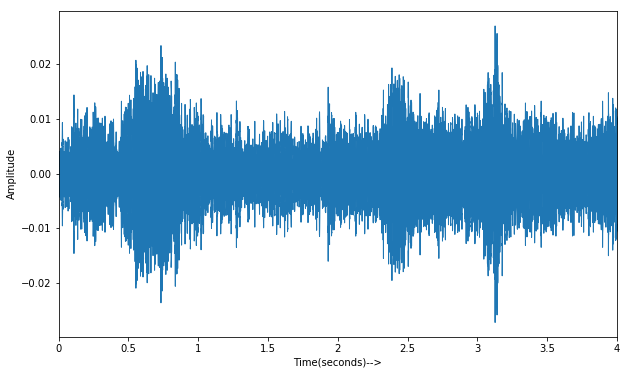

In [9]:
from librosa import display

plt.figure(figsize=(10, 6))

# LIBROSA FUNCTION TO DISPLAY THE WAVE PLOT
librosa.display.waveplot(y = samples, sr = sampling_rate)

plt.xlabel("Time(seconds)-->")
plt.ylabel("Amplitude")
plt.show()

#### FOR DIFFERENT SOUNDS : 

In [10]:
labels = list(df['class'].unique())
files = {
'dog_bark' : '../input/urbansound8k/fold5/100032-3-0-0.wav',
'children_playing' : '../input/urbansound8k/fold5/100263-2-0-117.wav',
'car_horn' :  '../input/urbansound8k/fold6/128465-1-0-1.wav',
'air_conditioner' : '../input/urbansound8k/fold1/134717-0-0-22.wav', 
'street_music' : '../input/urbansound8k/fold9/14527-9-0-7.wav',
'gun_shot' : '../input/urbansound8k/fold2/145608-6-0-0.wav',
'siren' : '../input/urbansound8k/fold4/156868-8-1-0.wav',
'engine_idling' : '../input/urbansound8k/fold4/128160-5-0-6.wav',
'jackhammer' : '../input/urbansound8k/fold9/105029-7-2-15.wav',
'drilling' : '../input/urbansound8k/fold3/103199-4-0-6.wav'
}    

In [11]:
Audio(files['street_music'])

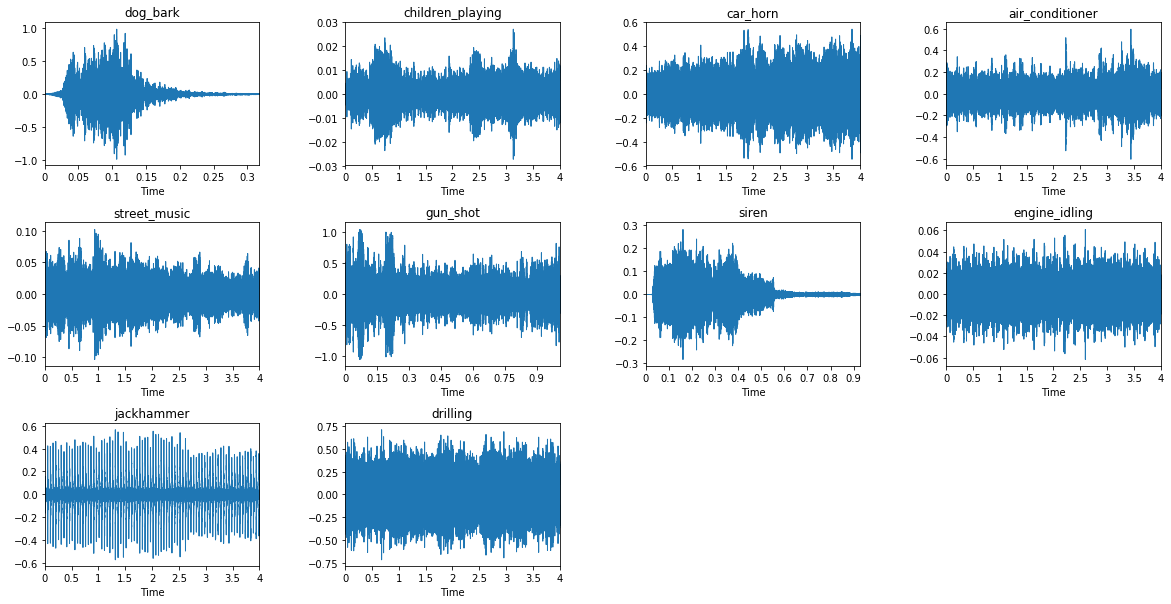

In [15]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, label in enumerate(labels):
    fn = files[label]
    fig.add_subplot(3, 4, i+1)
    plt.title(label)
    data, sample_rate = librosa.load(fn)
    librosa.display.waveplot(data, sr= sample_rate)
plt.show()

# MFCC (VVIP)

In [16]:
mfccs = librosa.feature.mfcc(y=samples, sr=sampling_rate, n_mfcc = 40)

In [17]:
print(mfccs.shape)

(40, 173)


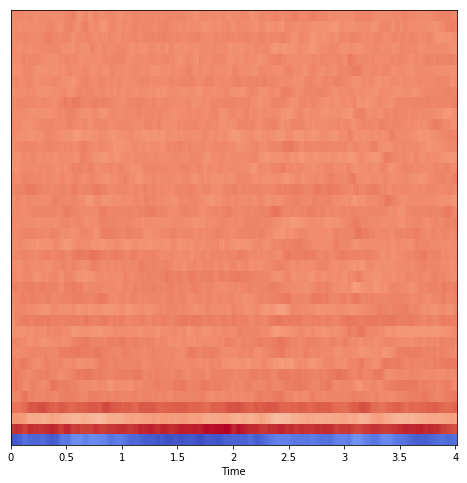

In [18]:
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')
plt.show()

# FEATURE EXTRACTION

Now we will extract the features from each audio file in the datset and form a new dataset. This dataset will be the input to our sequential model.

In [20]:

# VARIABLES TO STORE THE FEATURES AND 
# THE CORRESPONDING LABELS OF EACH AUDIO FILE 
features = []
labels = []

# FUNCTION TO EXTRACT THE FEATURES
def feature_extractor():
    
    # LOOP FOR ALL THE AUDIO FILES
    # ONLY 100 AUDIO FILES ARE PROCESSED DUE TO COMPUTATIONAL POWER OF MY PC
    # ON A STRONGER MACHINE REPLACE 100 WITH 8732 (THE NUMBER OF TRAINING EXAMPLES)
    for i in range(8732):
        
#         print(".",end="")
        
        
        file_name = '../input/urbansound8k/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        
        # kaiser_fast IS USED TO DATA FASTER
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # MFCC FEATURE EXTRACTION
        mels = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc = 40).T,axis=0)        
        
        # APPENDING THE FEATURES TO feature ARRAY
        features.append(mels)
        # APPENDING THE LABELS TO label ARRAY
        # BASED ON THE INDEX NUMBER OF THE AUDIO FILE IN THE DATASET
        labels.append(df["classID"][i])
        
        
    return [features, labels]

# CALL THE FUNCTION TO EXTRACT THE FEATURES
feature_extractor()

print("COMPLETED!")

COMPLETED!


### CONSTRUCTION OF NEW DATAFRAME BASED ON THE EXTRACTED FEATURES AND CORRESSPONDING LABELS

In [21]:
new_df = pd.DataFrame({'feature':features, 'label':labels})
new_df.head()

,feature,label
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",3
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",2
2,"[-459.56467, 122.800354, -47.92471, 53.265697,...",2
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",2
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",2


In [22]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


# Convert features and corresponding classification labels into numpy arrays
X = np.array(new_df.feature.tolist())
y = np.array(new_df.label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [23]:
X.shape

# # split the dataset 
# from sklearn.model_selection import train_test_split 
# x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)

(8732, 40)

In [24]:
yy.shape

(8732, 10)

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)

In [26]:
X_train.shape

(6985, 40)

In [27]:
X_test.shape

(1747, 40)

# MODEL IMPLEMENTATION

## 1. SIMPLE MODEL 

In [28]:
num_labels = yy.shape[1]

model = Sequential()

In [29]:

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              41984     
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [31]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test))

Train on 6985 samples, validate on 1747 samples
Epoch 1/100
6985/6985 [==============================] - 3s 380us/step - loss: 2.5214 - accuracy: 0.3903 - val_loss: 1.3343 - val_accuracy: 0.5369
Epoch 2/100
6985/6985 [==============================] - 2s 285us/step - loss: 1.2957 - accuracy: 0.5549 - val_loss: 1.1003 - val_accuracy: 0.6434
Epoch 3/100
6985/6985 [==============================] - 2s 282us/step - loss: 1.0550 - accuracy: 0.6421 - val_loss: 0.9452 - val_accuracy: 0.6795
Epoch 4/100
6985/6985 [==============================] - 2s 284us/step - loss: 0.8578 - accuracy: 0.7081 - val_loss: 0.8723 - val_accuracy: 0.7046
Epoch 5/100
6985/6985 [==============================] - 2s 289us/step - loss: 0.7416 - accuracy: 0.7513 - val_loss: 0.6944 - val_accuracy: 0.7785
Epoch 6/100
6985/6985 [==============================] - 2s 285us/step - loss: 0.6298 - accuracy: 0.7822 - val_loss: 0.6879 - val_accuracy: 0.7722
Epoch 7/100
6985/6985 [==============================] - 2s 301us/step

6985/6985 [==============================] - 2s 282us/step - loss: 0.1249 - accuracy: 0.9618 - val_loss: 0.4303 - val_accuracy: 0.9296
Epoch 57/100
6985/6985 [==============================] - 2s 283us/step - loss: 0.1160 - accuracy: 0.9642 - val_loss: 0.4691 - val_accuracy: 0.9204
Epoch 58/100
6985/6985 [==============================] - 2s 279us/step - loss: 0.1132 - accuracy: 0.9666 - val_loss: 0.5254 - val_accuracy: 0.9101
Epoch 59/100
6985/6985 [==============================] - 2s 286us/step - loss: 0.0964 - accuracy: 0.9708 - val_loss: 0.4696 - val_accuracy: 0.9239
Epoch 60/100
6985/6985 [==============================] - 2s 313us/step - loss: 0.0746 - accuracy: 0.9758 - val_loss: 0.5331 - val_accuracy: 0.9153
Epoch 61/100
6985/6985 [==============================] - 2s 287us/step - loss: 0.0965 - accuracy: 0.9711 - val_loss: 0.4791 - val_accuracy: 0.9210
Epoch 62/100
6985/6985 [==============================] - 2s 279us/step - loss: 0.1212 - accuracy: 0.9631 - val_loss: 0.4940 

In [33]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print(score)

1747/1747 [==============================] - 0s 51us/step
[0.5780851053224336, 0.9290211796760559]


## MODEL DISPLAY

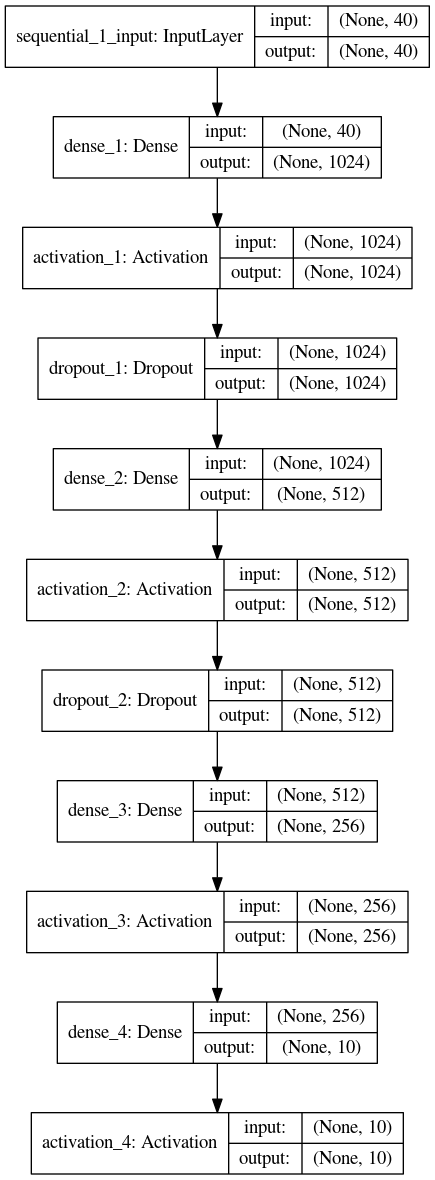

In [34]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='simple_model_plot.png', show_shapes=True, show_layer_names=True)

## SAVE MODEL

In [43]:
from tensorflow import keras

In [44]:
model.save("simple_model")
print("SIMPLE MODEL SAVED!")

SIMPLE MODEL SAVED!


In [45]:
print("LOADING THE SIMPLE MODEL FROM THE DISK..")
loaded_simple_model = keras.models.load_model("simple_model")
 
loaded_simple_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("OUTPUT :-")
loaded_simple_model.evaluate(X_test, y_test)

LOADING THE SIMPLE MODEL FROM THE DISK..
OUTPUT :-
1747/1747 [==============================] - 0s 138us/sample - loss: 0.5781 - accuracy: 0.9290


[0.5780851053224336, 0.9290212]

# END